In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Data Loading and Preprocessing

In [18]:
data = pd.read_csv('/content/sample_data/onlinefoods.csv')

missing_values = data.isnull().sum()
data.replace('N/A', np.nan, inplace=True)

data_encoded = pd.get_dummies(data, columns=[ 'Gender', 'Occupation', 'Educational Qualifications', 'Feedback'], drop_first=True)

selected_features = ['Age','Family size']
x = data_encoded[selected_features]
y = data['Feedback']

# 2. Exploratory Data Analysis

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


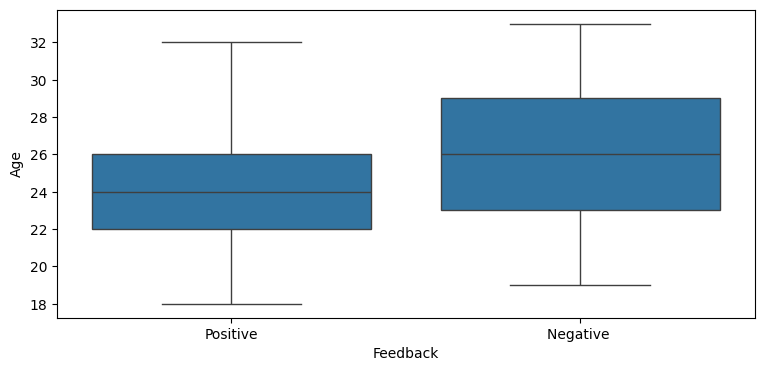

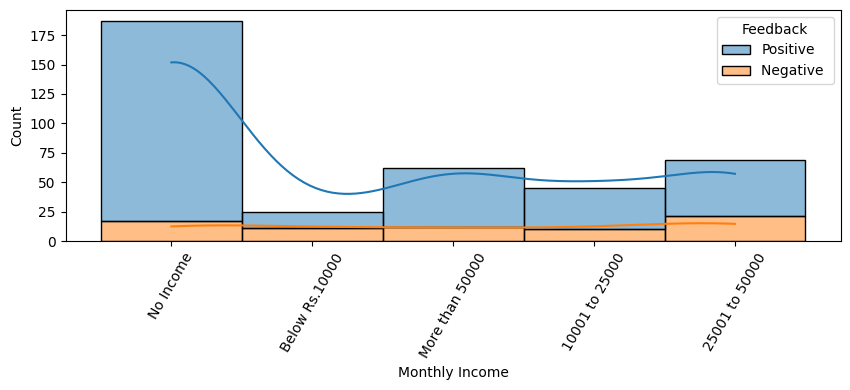

<ipython-input-19-cecf77c5abc1>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_encoded.corr()


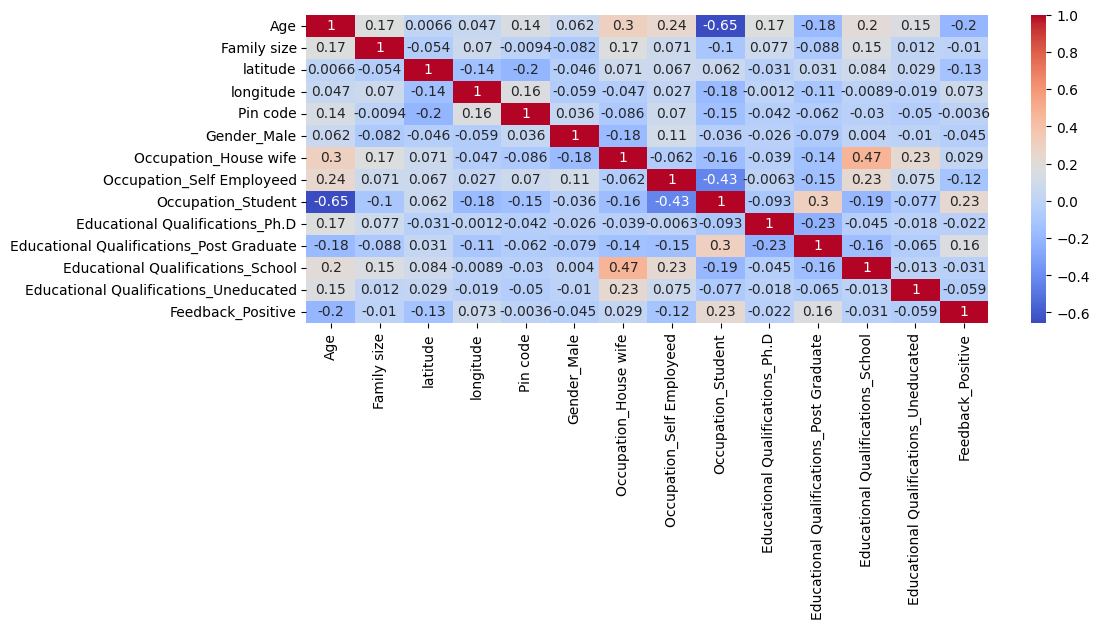

In [19]:
print(data.describe())

plt.figure(figsize=(9,4))
sns.boxplot(x='Feedback', y='Age', data=data)
plt.show()

plt.figure(figsize=(10,3))
sns.histplot(x='Monthly Income', hue='Feedback', data=data, kde=True, multiple='stack')
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(11,4))
corr = data_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# 3. Logistic Regression Model

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

# 4. Data Analysis and Visualization

In [21]:
y_pred = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
feedback_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion: ")
print(conf_matrix)
print("Classification Report: ")
print(feedback_report)

Accuracy: 0.8589743589743589
Confusion: 
[[ 0 11]
 [ 0 67]]
Classification Report: 
              precision    recall  f1-score   support

   Negative        0.00      0.00      0.00        11
    Positive       0.86      1.00      0.92        67

    accuracy                           0.86        78
   macro avg       0.43      0.50      0.46        78
weighted avg       0.74      0.86      0.79        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
